In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
raw_dataset = pd.read_csv("BigQuery_Ethereum_Dataset.csv")


Remove multiple edges between two nodes

In [ ]:
pairs = []
pairs_value = []
count = 0
for index, row in raw_dataset.iterrows():
  #if str(row["input"]) != str(row["output"]):
  pair = {"input_key": row["input"], "output_key": row["output"]}
  if pair not in pairs:
    pairs.append(pair)
df_pairs = pd.DataFrame(pairs)



Masking Nodes with ID

In [ ]:
address_list = []
trans_list = []
for index, row in df_pairs.iterrows():
  if row["input_key"] not in address_list:
    address_list.append(row["input_key"])
  if row["output_key"] not in address_list:
    address_list.append(row["output_key"])
  df_row = {'from': address_list.index(row["input_key"]),
            'to': address_list.index(row["output_key"])}
  trans_list.append(df_row)

df_trans_list = pd.DataFrame(trans_list)
df_address_list = pd.DataFrame(address_list)
df_trans_list.to_csv("masked_dataset.csv", index=False)
df_address_list.to_csv("address_list.csv", index=False)

**Basic analysis**

counting number of transaction

In [ ]:
node_list = []
for index, row in df_trans_list.iterrows():
  if row["from"] not in node_list:
    node_list.append(row["from"])
  if row["to"] not in node_list:
    node_list.append(row["to"])
in_count = np.zeros(len(node_list))
out_count = np.zeros(len(node_list))
for index, row in df_trans_list.iterrows():
  i_in = int(row["from"])
  i_out = int(row["to"])
  in_count[i_in] = in_count[i_in] + 1
  out_count[i_out] = out_count[i_out] + 1


In [ ]:
# create table with total transfer
total_list = []
for j in range(len(node_list)):
  total_row = {
      "node": node_list[j],
      "in": in_count[j],
      "out": out_count[j],
      "total": in_count[j] + out_count[j]
  }
  total_list.append(total_row)

df_total_list = pd.DataFrame(total_list)
df_total_list.to_csv("node_degree_list.csv", index=False)

In [ ]:
# sort list of node degree
rank_total_list = sorted(total_list, key = lambda row_: row_["total"], reverse=True)
df_sorted_node_degree_list = pd.DataFrame(rank_total_list)
df_sorted_node_degree_list.to_csv('sorted_node_degree.csv', index=False)

Visualize distribution

In [ ]:
# draw total transaction based on address
total_trans = df_sorted_node_degree_list[:100].total
total_trans_address = df_sorted_node_degree_list[:100].node.astype(str)

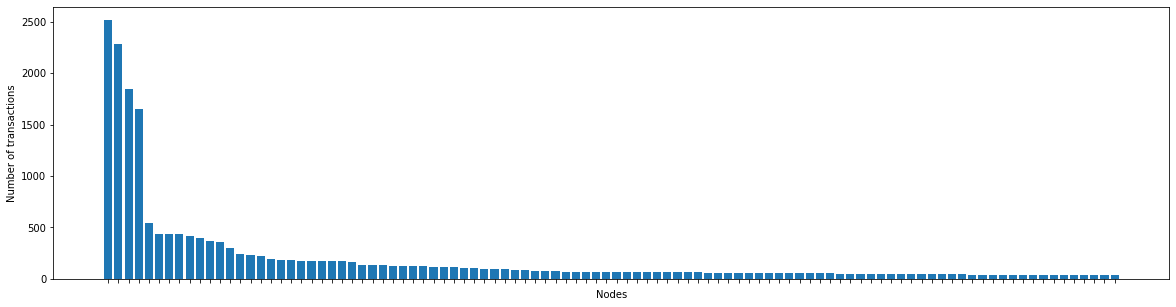

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(total_trans_address, total_trans)
plt.xlabel("Nodes")
plt.ylabel("Number of transactions")
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show()


In [ ]:
df_rank_total_p1 = df_sorted_node_degree_list.total[:100]
df_rank_total_p2 = df_sorted_node_degree_list.total[100:300]
df_rank_total_p3 = df_sorted_node_degree_list.total[300:1000]
df_rank_total_p4 = df_sorted_node_degree_list.total[1000:]

In [ ]:
df_rank_norm_p1 = (df_rank_total_p1 - df_rank_total_p1.min())/(df_rank_total_p1.max() - df_rank_total_p1.min())
df_rank_norm_p2 = (df_rank_total_p2 - df_rank_total_p2.min())/(df_rank_total_p2.max() - df_rank_total_p2.min())
df_rank_norm_p3 = (df_rank_total_p3 - df_rank_total_p3.min())/(df_rank_total_p3.max() - df_rank_total_p3.min())
df_rank_norm_p4 = (df_rank_total_p4 - df_rank_total_p4.min())/(df_rank_total_p4.max() - df_rank_total_p4.min())

In [ ]:
print(df_rank_total_p1.mean())
print(df_rank_total_p2.mean())
print(df_rank_total_p3.mean())
print(df_rank_total_p4.mean())

191.71
14.95
3.867142857142857
1.0354635791776825


In [ ]:
dataset = [df_rank_norm_p1, df_rank_norm_p2, df_rank_norm_p3, df_rank_norm_p4]

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


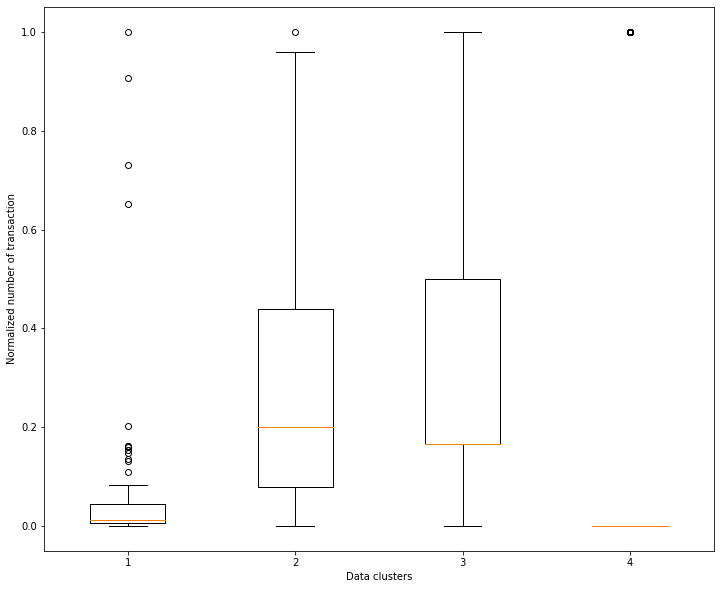

In [ ]:
plt.figure(figsize=(12,10))
plt.xlabel("Data clusters")
plt.ylabel("Normalized number of transaction")
plt.boxplot(dataset)

plt.show()